## KNN for Air Quality Index Prediction

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_pickle("./data/data_air_quality_index.pkl")

In [7]:
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [8]:
data.shape

(1093, 9)

In [9]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [16]:
pred_knn_model = knn_model.predict(X_test)

In [13]:
knn_model.score(X_train, y_train)

0.7481379711422015

In [12]:
knn_model.score(X_test, y_test)

0.460871793157543

In [15]:
cross_val_score(knn_model, X, y, cv=5).mean()

0.43210126775950347

In [17]:
mean_squared_error(y_test, pred_knn_model)

4181.045818583777

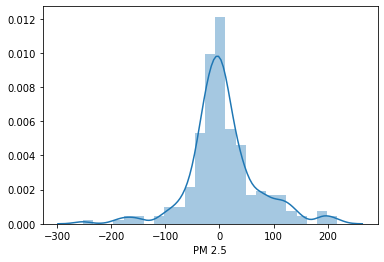

In [19]:
sns.distplot(y_test-pred_knn_model)
plt.show()

In [20]:
(y_test-pred_knn_model).var()

4156.063924390376

In [42]:
k_best = []
k_max=20

for k in range(1, k_max, 1):
    knn_k = KNeighborsRegressor(n_neighbors=k)
    #knn_k.fit(X_train,y_train)
    score = cross_val_score(knn_k, X, y, cv=5, scoring='neg_mean_squared_error').mean()
    #print(score, knn_k.score(X_test, y_test))
    k_best.append(score)

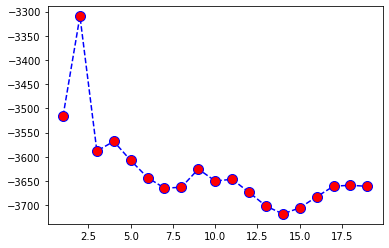

In [43]:
plt.plot(range(1,k_max,1), k_best, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.show()

In [44]:
knn_regressor = KNeighborsRegressor(n_neighbors=2)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [45]:
pred_knn_regrssor = knn_regressor.predict(X_test)

In [34]:
knn_regressor.score(X_train, y_train)

0.8893566200255023

In [35]:
knn_regressor.score(X_test, y_test)

0.36733322984080846

In [36]:
cross_val_score(knn_regressor, X, y, cv=5).mean()

0.44417945229650435

In [38]:
mean_squared_error(y_test, pred_knn_regrssor)

4906.455867748669

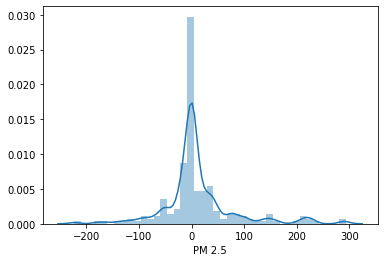

In [39]:
sns.distplot(y_test-pred_knn_regrssor)
plt.show()

In [40]:
(y_test-pred_knn_regrssor).var()

4790.103565509907